In [21]:
import poppy
import copy
import pickle
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from skimage.transform import resize

%matplotlib qt

In [13]:
## BEGIN USER-DEFINED QUANTITIES

f_lens = 185*u.micron # initial focal length of lens (um)

# pixel scale of 'detector' (plane of waveguide entrance)
scale_wg = 0.2161*u.micron/u.pix # um/pix

diam_lenslet = 66.*u.micron # lenslet diameter (um)

## END USER-DEFINED QUANTITIES

In [3]:
# radius of first dark ring in um
wavel = (1.55/1.5255)*u.micron # um # 1.55 um in air, 1.55um/n = 1.55um/1.5255 = 1.016 um in substrate of index of refraction n
foc_length = 284.664*u.micron # 

circ_r_um = 1.22 * wavel * foc_length/diam_lenslet
#circ_r_pix = um2pix(circ_r_um)

print('radius of first dark Airy ring (um):',circ_r_um)

radius of first dark Airy ring (um): 5.346479783081552 micron


In [4]:
# read in waveguide mode

'''
S. Gross:

The waveguide modes have a 4sigma diameter of 8.3x7.6um. 
A simple Gaussian fit gives a 1/e2 diameter of 5.8x5.4um. 
Both at a wavelength of 1550nm.

The attached CSV file contains the corresponding intensity profile. 
The scale is 0.2161um per pixel.
'''

# retrieve waveguide intensity and make cutout
stem = '/Users/bandari/Documents/git.repos/glint_misc/notebooks/data/'
open_file = open(stem + 'waveguide_intensity.pkl', "rb")
df_intensity, xycen = pickle.load(open_file)
open_file.close()
# cutouts
buffer = 100 # pix
waveguide_cutout = df_intensity[int(xycen[1]-buffer):int(xycen[1]+buffer),int(xycen[0]-buffer):int(xycen[0]+buffer)]

In [14]:
# physical dims of waveguide pattern

x_dim_waveguide, y_dim_waveguide = np.multiply(np.shape(waveguide_cutout),scale_wg*u.pixel)

In [15]:
x_dim_waveguide

<Quantity 43.22 micron>

In [7]:
np.shape(waveguide_cutout)

(200, 200)

In [16]:
# construct system with lens of focal length f um and project image

npix = 1024 # ~512 is minimum to accurately recover the central diffraction spike

wf = poppy.FresnelWavefront(beam_radius=0.5*diam_lenslet, wavelength=1.55e-6, npix=npix, oversample=4)
wf *= poppy.CircularAperture(radius=0.5*diam_lenslet) 

conv_lens = poppy.QuadraticLens(f_lens=f_lens)
wf *= conv_lens

wf.propagate_fresnel(f_lens)

wf_1 = copy.deepcopy(wf)

# crop to the physical size of the waveguide cutout
wf *= poppy.RectangleAperture(width=x_dim_waveguide, height=y_dim_waveguide)

wf_2 = copy.deepcopy(wf)

'''
wf.display('both', scale='log', 
           vmax=wf.amplitude.max(), vmin=wf.amplitude.max()*1e-5, 
           imagecrop=10.*circ_r_um)
'''

"\nwf.display('both', scale='log', \n           vmax=wf.amplitude.max(), vmin=wf.amplitude.max()*1e-5, \n           imagecrop=10.*circ_r_um)\n"

In [32]:
plt.imshow(wf_1.amplitude-wf_2.amplitude, 
           norm='linear')
plt.show()

In [40]:
np.shape(wf_2.amplitude)

(4096, 4096)

In [17]:
# physical scale of propagated wavefront compared to waveguide mode
# (i.e., a scale > 1 means wavefront is coarser ('smaller') than the waveguide mode)

scale_wf_2_wg = (wf_2.pixelscale.to(u.micron/u.pix))/scale_wg

In [23]:
scale_wf_2_wg*np.shape(wf_2.amplitude)

<Quantity [20443.93038602, 20443.93038602]>

In [26]:
# rescale wavefront by this much 

wf_amp_rescaled = resize(wf_2.amplitude,(10,10)) #scale_wf_2_wg*np.shape(wf_2.amplitude))

In [27]:
plt.imshow(wf_amp_rescaled)
plt.show()

In [25]:
scale_wf_2_wg*np.shape(wf_2.amplitude)

<Quantity [20443.93038602, 20443.93038602]>

In [13]:
test = wf_2.amplitude[~np.all( wf_2.amplitude == 0, axis=1 )]


In [14]:
np.shape(test)

(41, 4096)

In [64]:
test2 = test[~np.all( test == 0, axis=1 )]

In [ ]:
~np.all(OriginMat == 0, axis = 0)

In [66]:
plt.imshow(test2)
plt.show()

In [ ]:
wf_2.display('amplitude', scale='log', 
           vmax=wf.amplitude.max(), vmin=wf.amplitude.max()*1e-5)

In [35]:
wf.amplitude

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# -----------------------------------------------------

In [46]:
# for secondary physical axes: 0.2161um per pixel.
def pix2um(x):
    return x*0.2161

def um2pix(x):
    return x/0.2161

# radius of first dark ring in um
wavel = 1.55/1.5255 # um # 1.55 um in air, 1.55um/n = 1.55um/1.5255 = 1.016 um in substrate of index of refraction n
foc_length = 284.664 # 
D = 66 # um

circ_r_um = 1.22 * wavel * foc_length/D
circ_r_pix = um2pix(circ_r_um)

In [47]:
circ_cen_x = 0
circ_cen_y = 0 
circ1 = Circle((circ_cen_x,circ_cen_y),radius=circ_r_pix,color='white',fill=False)

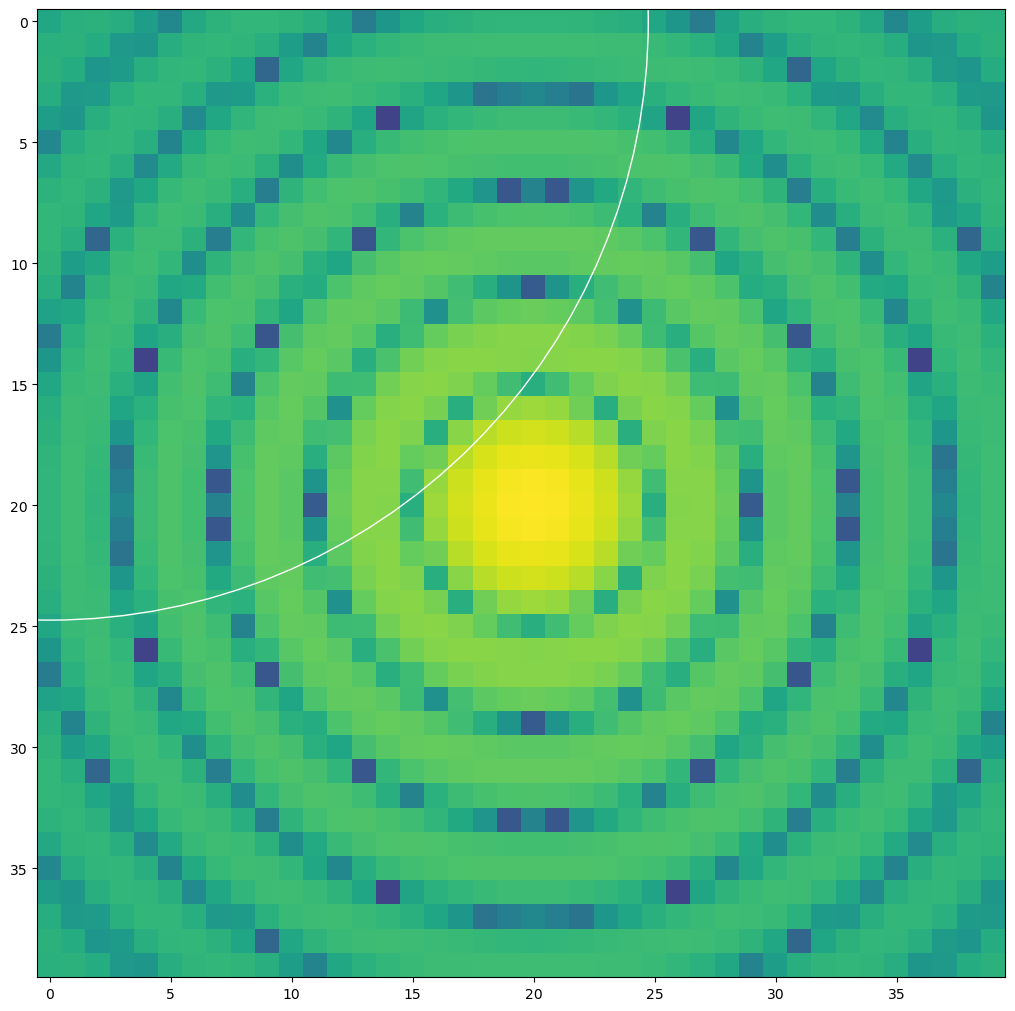

In [48]:
buffer = 20

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), layout='constrained')
ax.imshow(wf.amplitude[int(0.5*np.shape(wf.amplitude)[0]-buffer):int(0.5*np.shape(wf.amplitude)[0]+buffer),
                       int(0.5*np.shape(wf.amplitude)[0]-buffer):int(0.5*np.shape(wf.amplitude)[0]+buffer)], 
           norm='log', 
           vmax=wf.amplitude.max(), vmin=wf.amplitude.max()*1e-5)
ax.add_patch(circ1)
plt.show()

In [39]:
int(0.5*np.shape(wf.amplitude)[0]-buffer)

1948

In [ ]:
#circ3 = Circle((circ_cen_x,circ_cen_y),radius=circ_r_pix,color='white',fill=False)

In [3]:
# construct system
osys_circ = poppy.OpticalSystem()

# lenslet
lens = osys_circ.add_pupil(optic = poppy.ThinLens(name='lenslet', nwaves=0, radius=diam_lenslet))

# final focal plane
det = osys_circ.add_detector(pixelscale=pixelscale_ang, fov_pixels=100)  # image plane coordinates in arcseconds
#psf = osys_circ.calc_psf(wavelength=1.550*u.micron)

# see transmittance
#osys_circ.display()

#poppy.display_psf(psf)

psf, all_wfs = osys_circ.calc_psf(wavelength=1.550*u.micron, 
                         display_intermediates=False,
                         return_intermediates=True)

NameError: name 'diam_lenslet' is not defined